In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fauzanmusyaffa","key":"d9f6eb8b4c613c14e9748ad4a846ff17"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d nareshbhat/wine-quality-binary-classification

  0% 0.00/25.3k [00:00<?, ?B/s]
100% 25.3k/25.3k [00:00<00:00, 42.6MB/s]


In [4]:
!mkdir wine-quality-binary-classification
!unzip wine-quality-binary-classification.zip -d wine-quality-binary-classification
!ls wine-quality-binary-classification

Archive:  wine-quality-binary-classification.zip
  inflating: wine-quality-binary-classification/wine.csv  
wine.csv


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv('/content/wine-quality-binary-classification/wine.csv')

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [31]:
df.shape

(1599, 12)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [33]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [34]:
df.duplicated().sum()

240

<ipython-input-35-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

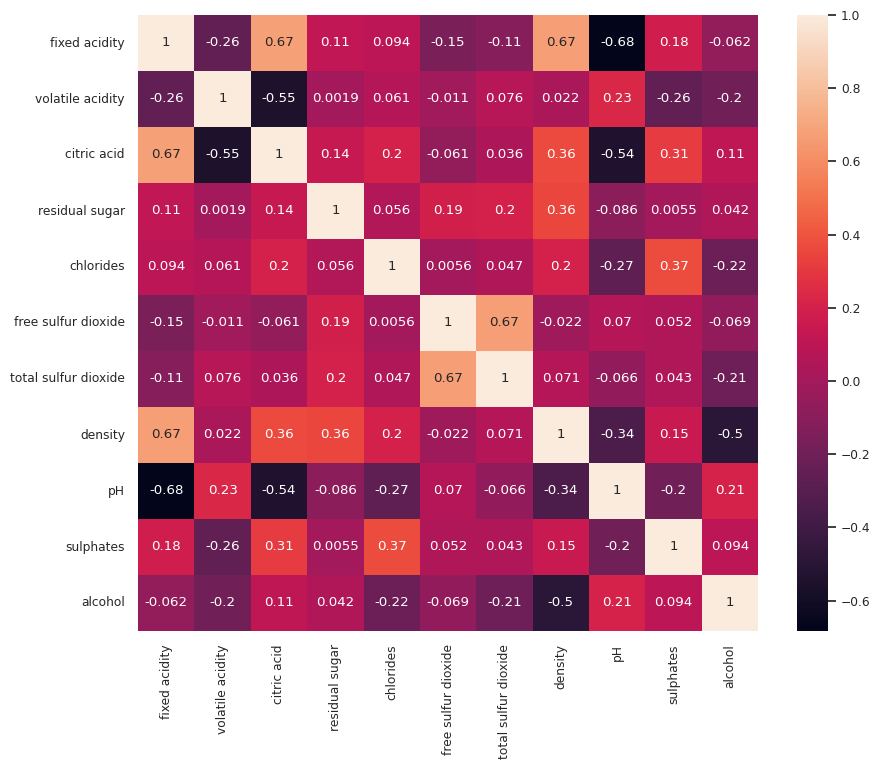

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [36]:
df = df.drop_duplicates()
df.duplicated().sum()

0

<Axes: xlabel='quality', ylabel='Count'>

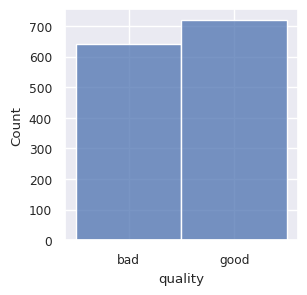

In [37]:
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=df, x='quality')

In [38]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [39]:
df.replace(('bad','good'), (0,1), inplace=True)

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [41]:
X = df.drop (columns='quality', axis=1)
Y = df['quality']

In [42]:
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(1359, 11) (1087, 11) (272, 11)


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [47]:
print("Akurasi data training : ", training_data_accuracy)

Akurasi data training :  0.7488500459981601


In [49]:
input_data = (11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)
print()
if (prediction[0] == 0):
    print('Kualitas wine buruk')
else :
    print('Kualitas wine bagus')

[1]

Kualitas wine bagus


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
import pickle

In [52]:
filename = 'kualitas-wine.sav'
pickle.dump(model, open(filename,'wb'))